In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import graphviz
from sklearn.cluster import KMeans
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz

### Ex. 1

In [86]:
encontros = pd.read_csv('./datasets/encontros.csv')
encontros

,tipo_dia,tipo_encontro,meteo,tv,encontro
0,semana,jantar,quente,mau,sim
1,semana,jantar,frio,bom,nao
2,semana,jantar,quente,bom,sim
3,semana,jantar,frio,mau,nao
4,semana,jantar,quente,bom,sim
5,semana,disco,quente,bom,nao
6,semana,disco,quente,mau,nao
7,semana,disco,frio,bom,nao
8,semana,disco,frio,mau,nao
9,fim_semana,disco,quente,mau,sim


In [87]:
# encode the features since scikit-learn can only deal with numeric features
# semana -> 0
# fim_semana -> 1
encontros['tipo_dia'] = np.where(encontros['tipo_dia'] == 'semana', 0, 1)
# jantar -> 0
# disco -> 1
encontros['tipo_encontro'] = np.where(encontros['tipo_encontro'] == 'jantar', 0, 1)
# quente -> 1
# frio -> 0
encontros['meteo'] = np.where(encontros['meteo'] == 'quente', 1, 0)
# mau -> 0
# bom -> 1
encontros['tv'] = np.where(encontros['tv'] == 'mau', 0, 1)
# sim -> 1
# nao -> 0
encontros['encontro'] = np.where(encontros['encontro'] == 'sim', 1, 0)
encontros

,tipo_dia,tipo_encontro,meteo,tv,encontro
0,0,0,1,0,1
1,0,0,0,1,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
5,0,1,1,1,0
6,0,1,1,0,0
7,0,1,0,1,0
8,0,1,0,0,0
9,1,1,1,0,1


In [88]:
# train a decision tree model
X = encontros.iloc[:,:-1] # the training features (independent features) TODAS AS VARIAVEIS EXCETO A ULTIMA
Y = encontros['encontro'] # the target feature (dependent feature)
# train the model
enc_tree = tree.DecisionTreeClassifier()
enc_tree.fit(X, Y)

DecisionTreeClassifier()

In [89]:
# visualize the tree as text
print(tree.export_text(enc_tree))

|--- feature_2 <= 0.50
|   |--- feature_0 <= 0.50
|   |   |--- class: 0
|   |--- feature_0 >  0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 1
|--- feature_2 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_0 >  0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- feature_0 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.50
|   |   |   |--- class: 1



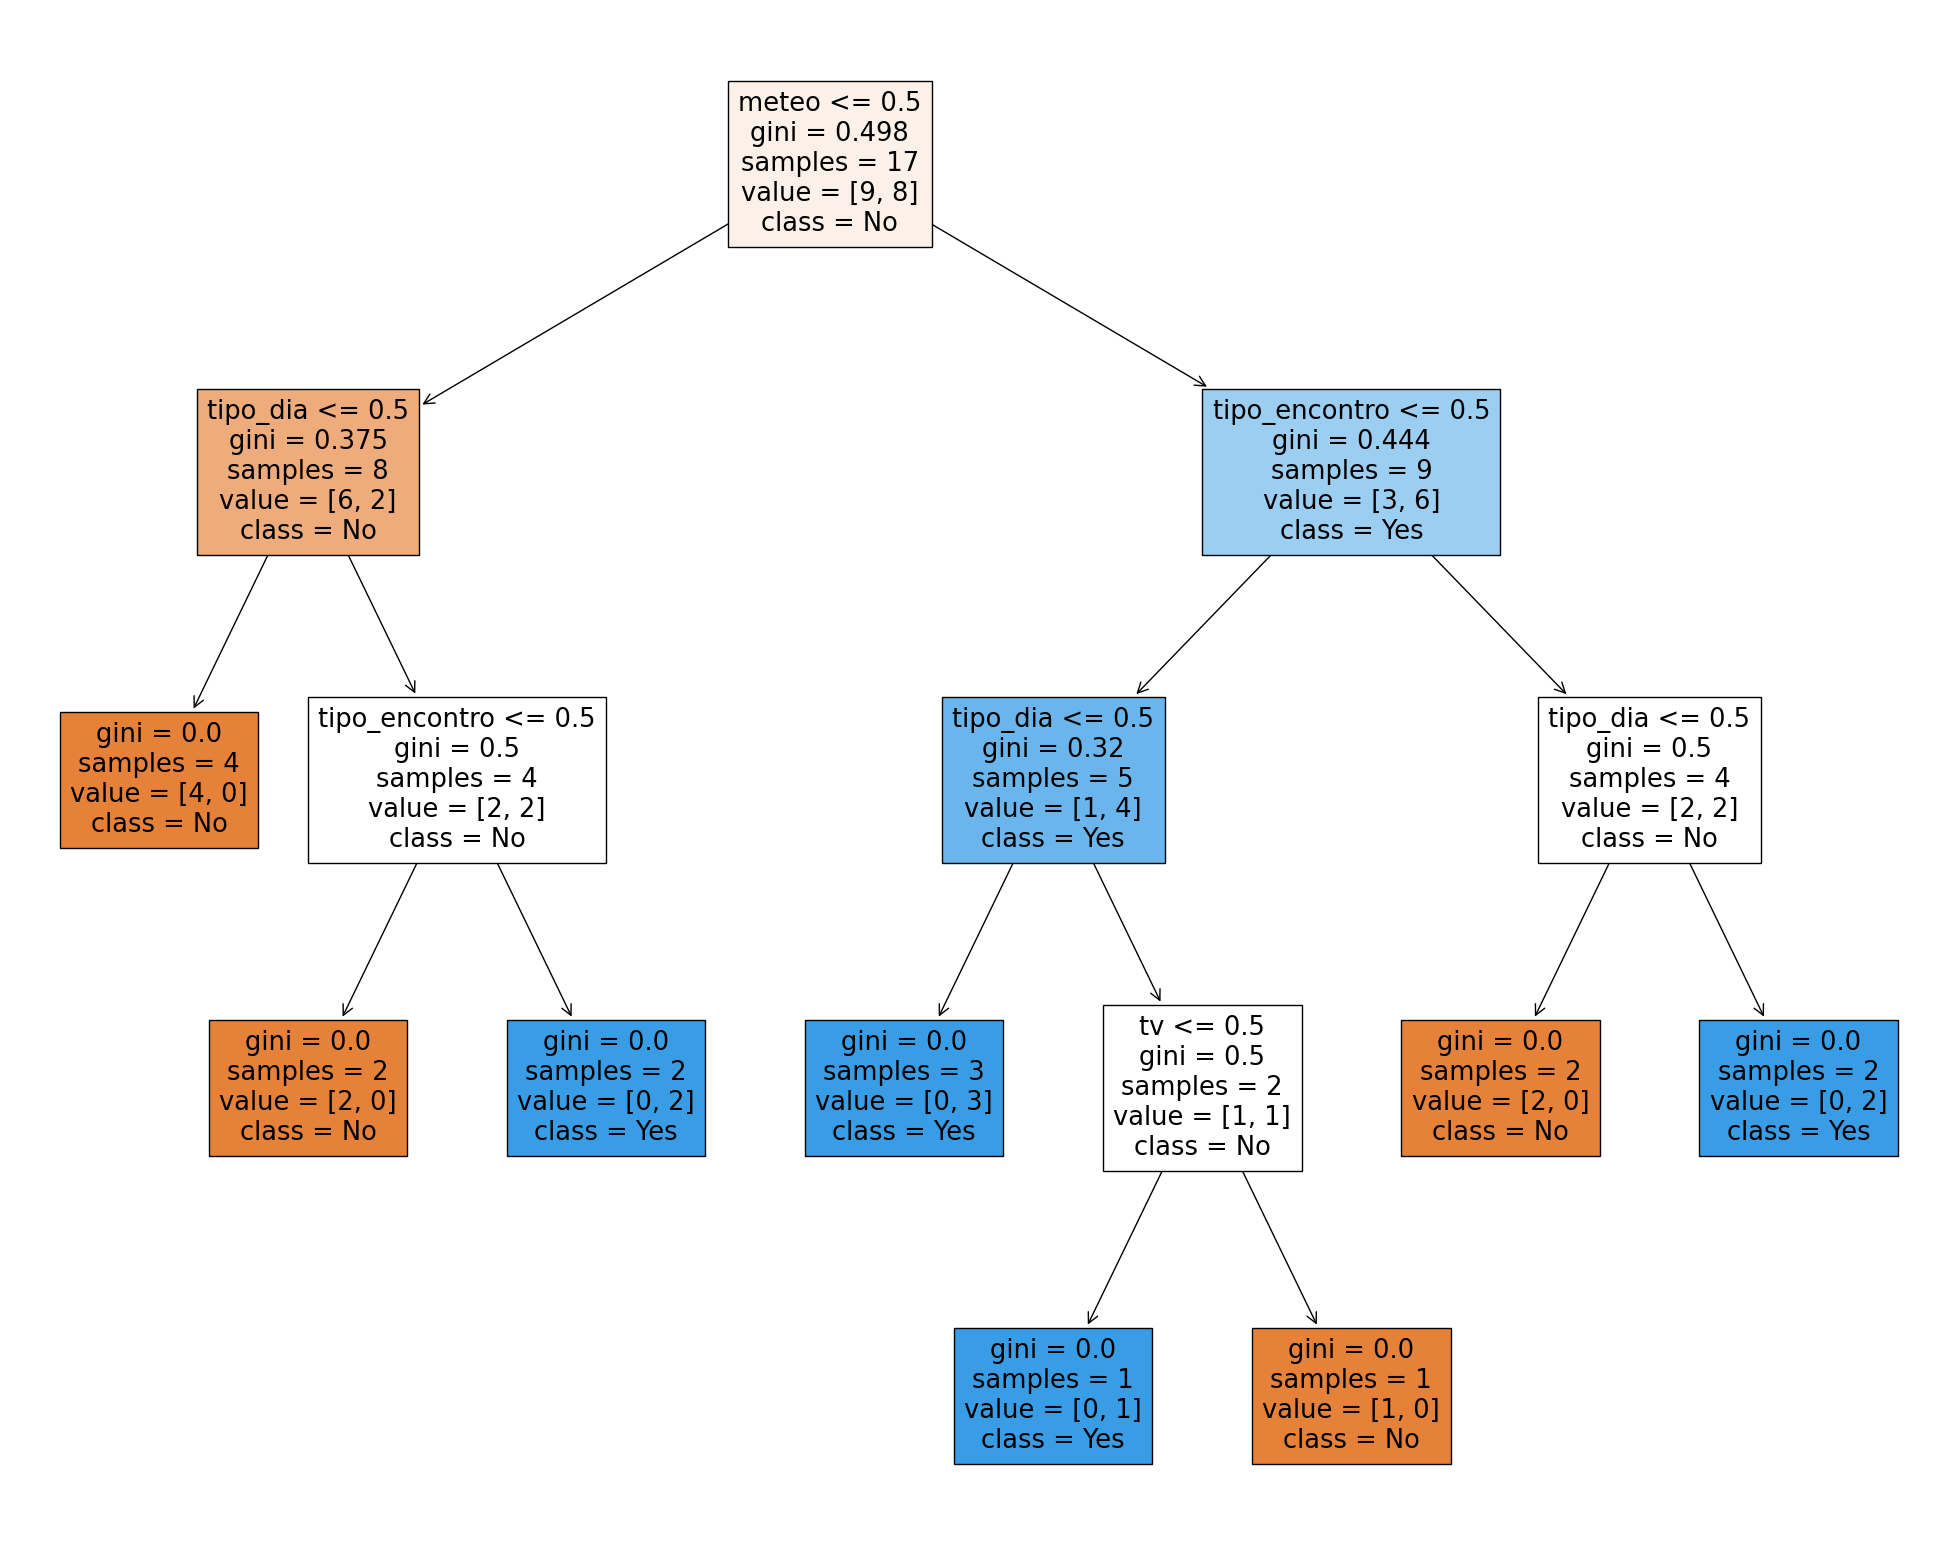

In [90]:
# visualize the tree without graphviz
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(enc_tree, 
                   feature_names=X.columns,  
                   class_names=['No', 'Yes'],
                   filled=True)

#gini = desvio padrao

In [91]:
# visualize the tree with graphviz
dot_data = tree.export_graphviz(enc_tree, out_file=None, feature_names=X.columns, class_names=['Não', 'Sim'], filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph.render("encontro") 

'encontro.pdf'

## Predict on a specific row of data

In [92]:
# manually create data: semana, disco, frio, bom 
data = [[0, 1, 0, 1],[1, 1, 1, 1],[0, 1, 0, 0]]
columns = ["tipo_dia", "tipo_encontro", "meteo", "tv"]
df = pd.DataFrame(data, columns=columns)

# predict on the data
enc_tree.predict(df)

array([0, 1, 0])

avaliação do modelo usando métricas cm precisão, recall, F1-score, ou uma matriz de confusão. Isso ajudaria a entender o desempenho do modelo em termos de quão bem ele está classificando as previsões.

In [93]:
# Dividir os dados em treino e teste
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# Treinar o modelo nos dados de treino
enc_tree.fit(X_train, Y_train)

# Prever nos dados de teste
predictions = enc_tree.predict(X_test)

# Avaliar o modelo
print(classification_report(Y_test, predictions))

#A classe 0 teve uma precisão de 0.67 e um recall de 0.50, resultando num F1-score de 0.57.
#A classe 1 teve uma precisão de 0.33 e um recall de 0.50, resultando num F1-score de 0.40.
#A precisão média (weighted avg) foi de 0.56, c uma precisão geral (accuracy) de 0.50, indicando q 50% das previsões estavam corretas.

              precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.33      0.50      0.40         2

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.56      0.50      0.51         6



In [94]:
# Avaliar o modelo
print(confusion_matrix(Y_test, predictions))

#2 verdadeiros negativos (TN): O modelo previu corretamente 'não ocorreu' 2x.
#2 falsos positivos (FP): O modelo previu incorretamente 'ocorreu' 2x qd n ocorreu.
#1 falso negativo (FN): O modelo previu incorretamente 'não ocorreu' 1x qd realmente ocorreu.
#1 verdadeiro positivo (TP): O modelo previu corretamente 'ocorreu' 1x.

[[2 2]
 [1 1]]


# Ex. 2

In [95]:
titanic = pd.read_csv('./datasets/titanic.csv')
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22,1,0,7.2500,S
1,1,1,female,38,1,0,71.2833,C
2,1,3,female,26,0,0,7.9250,S
3,1,1,female,35,1,0,53.1000,S
4,0,3,male,35,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27,0,0,13.0000,S
887,1,1,female,19,0,0,30.0000,S
888,0,3,female,?,1,2,23.4500,S
889,1,1,male,26,0,0,30.0000,C


In [96]:
# limpeza de colunas
#titanic.drop(['PassengerId','Name','Ticket','Cabin'], axis='columns', inplace=True)
#titanic

# Converter 'Age' para numérico, tratando '?' como NaN
titanic['Age'] = pd.to_numeric(titanic['Age'], errors='coerce')

# Preencher os valores nulos em 'Age' com a mediana
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

C:\Users\alice\AppData\Local\Temp\ipykernel_19896\3748540550.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic['Age'].median(), inplace=True)


In [97]:
# male -> 1
# female -> 0
titanic['Sex'] = np.where(titanic['Sex'] == 'male', 1, 0)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [98]:
# encode Embarked with one-hot encoding (we'll talk about this later...)
# Aplicar get_dummies para 'Embarked' e outras variáveis categóricas
titanic = pd.get_dummies(titanic)
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_?,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,False,False,True
887,1,1,0,19.0,0,0,30.0000,False,False,False,True
888,0,3,0,28.0,1,2,23.4500,False,False,False,True
889,1,1,1,26.0,0,0,30.0000,False,True,False,False


In [99]:
# deal with missing values
#Os dados são verificados pra valores nulos
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_?    0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [100]:
# in this case we are going to remove all rows with missing data
# tds as linhas c dados ausentes na coluna Age são removidas.
print(titanic.columns)
titanic = titanic[titanic['Age'].notnull()]

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_?', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')


In [101]:
titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_?,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,False,False,False,True
1,1,1,0,38.0,1,0,71.2833,False,True,False,False
2,1,3,0,26.0,0,0,7.9250,False,False,False,True
3,1,1,0,35.0,1,0,53.1000,False,False,False,True
4,0,3,1,35.0,0,0,8.0500,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,False,False,False,True
887,1,1,0,19.0,0,0,30.0000,False,False,False,True
888,0,3,0,28.0,1,2,23.4500,False,False,False,True
889,1,1,1,26.0,0,0,30.0000,False,True,False,False


In [102]:
# split the data
#Divisão dos Dados: O dataset é dividido em conj de treino e teste.
train, test = train_test_split(titanic, test_size=0.25)

In [103]:
# train a decision tree model
#Treinamento do Modelo de Árvore de Decisão: Um modelo de árvore de decisão é treinado usando o conj de treino. O modelo é ajustado pra prever a sobrevivência dos passageiros (Survived).
X = train.iloc[:,1:] # the training features (independent features)
Y = train['Survived'] # the target feature (dependent feature)
# train the model
titanic_tree = tree.DecisionTreeClassifier()
titanic_tree.fit(X, Y)

DecisionTreeClassifier()

In [104]:
#Visualização da Árvore de Decisão: A árvore treinada é visualizada usando graphviz, mostrando cm as decisões são tomadas dentro do modelo
dot_data = tree.export_graphviz(titanic_tree, out_file=None, feature_names=X.columns, class_names=['No', 'Yes'], filled=True, rounded=True) 
graph = graphviz.Source(dot_data) 
graph.render("titanic") 

'titanic.pdf'

In [105]:
test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_?,Embarked_C,Embarked_Q,Embarked_S
93,0,3,1,26.0,1,2,20.5750,False,False,False,True
606,0,3,1,30.0,0,0,7.8958,False,False,False,True
739,0,3,1,28.0,0,0,7.8958,False,False,False,True
799,0,3,0,30.0,1,1,24.1500,False,False,False,True
801,1,2,0,31.0,1,1,26.2500,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
665,0,2,1,32.0,2,0,73.5000,False,False,False,True
126,0,3,1,28.0,0,0,7.7500,False,False,True,False
147,0,3,0,9.0,2,2,34.3750,False,False,False,True
721,0,3,1,17.0,1,0,7.0542,False,False,False,True


In [106]:
# Avaliação do modelo no conjunto de teste:
# Primeiro, faz-se a previsão usando o modelo de árvore de decisão (titanic_tree) aplicado ao conjunto de teste.
# As previsões são feitas para as observações no conjunto de teste, excluindo a primeira coluna que normalmente é a coluna alvo ('Survived').
predictions = titanic_tree.predict(test.iloc[:,1:])

# Os valores reais (ou verdadeiros) são extraídos do conjunto de teste para comparação com as previsões.
real_values = test['Survived']

# Calcula a acurácia do modelo:
# 'res' é uma série booleana que compara cada previsão com o valor real correspondente.
# 'correct' é uma lista de todos os valores True em 'res', onde a previsão foi igual ao valor real.
# A acurácia é então calculada como a proporção de previsões corretas em relação ao total de previsões feitas.
res = predictions == real_values
correct = [x for x in res if x]
accuracy = len(correct) / len(res)
print('This tree gets it right ' + str(round(accuracy*100,2)) + '% of the times')

This tree gets it right 78.92% of the times


In [107]:
print("PREDICTIONS:", predictions) # Exibe as previsões feitas pelo modelo.

PREDICTIONS: [0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0
 0 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 0 0
 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0
 0]


In [108]:
print("REAL VALUES:", real_values) # Exibe os valores reais para comparação.

REAL VALUES: 93     0
606    0
739    0
799    0
801    1
      ..
665    0
126    0
147    0
721    0
253    0
Name: Survived, Length: 223, dtype: int64


# Ex. 5

In [109]:
cars = pd.read_csv('./datasets/origem_carros.csv')
cars

,mpg,displacement,horsepower,weigth,acceleration,origin
0,35,72,69,1613,18,japanese
1,31,76,52,1649,17,japanese
2,39,79,58,1755,17,japanese
3,35,81,60,1760,16,japanese
4,31,71,65,1773,19,japanese
...,...,...,...,...,...,...
387,12,455,225,4951,11,american
388,12,429,198,4952,12,american
389,12,383,180,4955,12,american
390,11,400,150,4997,14,american


In [110]:
# Preparar dados
X = cars.drop('origin', axis=1)  # Exclui a coluna de origem para características
y = cars['origin']  # Usa 'origin' como a variável alvo

In [111]:
# Dividir dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [112]:
# Treinar árvore de decisão
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [113]:
# Avaliar modelo
predictions = tree.predict(X_test)
accuracy = tree.score(X_test, y_test)
print(f'Accuracy: {accuracy*100:.2f}%')

Accuracy: 79.59%


In [114]:
# Visualização da árvore (se necessário)
dot_data = export_graphviz(tree, out_file=None, filled=True, rounded=True,
                             special_characters=True, feature_names=X.columns, class_names=['USA', 'Europe', 'Japan'])
graph = graphviz.Source(dot_data)
graph.render("cars_origin")

'cars_origin.pdf'

# Ex. 4

In [115]:
cars = pd.read_csv('./datasets/origem_carros.csv')
cars

,mpg,displacement,horsepower,weigth,acceleration,origin
0,35,72,69,1613,18,japanese
1,31,76,52,1649,17,japanese
2,39,79,58,1755,17,japanese
3,35,81,60,1760,16,japanese
4,31,71,65,1773,19,japanese
...,...,...,...,...,...,...
387,12,455,225,4951,11,american
388,12,429,198,4952,12,american
389,12,383,180,4955,12,american
390,11,400,150,4997,14,american


In [116]:
X = cars.iloc[:,:-1] 
# train the model
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [117]:
# add the labels to the original dataset, for comparison
cars['cluster'] = kmeans.labels_
cars

,mpg,displacement,horsepower,weigth,acceleration,origin,cluster
0,35,72,69,1613,18,japanese,2
1,31,76,52,1649,17,japanese,2
2,39,79,58,1755,17,japanese,2
3,35,81,60,1760,16,japanese,2
4,31,71,65,1773,19,japanese,2
...,...,...,...,...,...,...,...
387,12,455,225,4951,11,american,1
388,12,429,198,4952,12,american,1
389,12,383,180,4955,12,american,1
390,11,400,150,4997,14,american,1


In [118]:
# let's look at the center of each cluster
pd.DataFrame(kmeans.cluster_centers_, columns=cars.columns[0:5])

,mpg,displacement,horsepower,weigth,acceleration
0,20.827869,212.614754,105.401639,3162.581967,16.040984
1,14.711111,344.144444,157.811111,4236.322222,13.611111
2,29.688889,107.205556,77.166667,2222.827778,16.472222


<Axes: xlabel='origin', ylabel='cluster'>

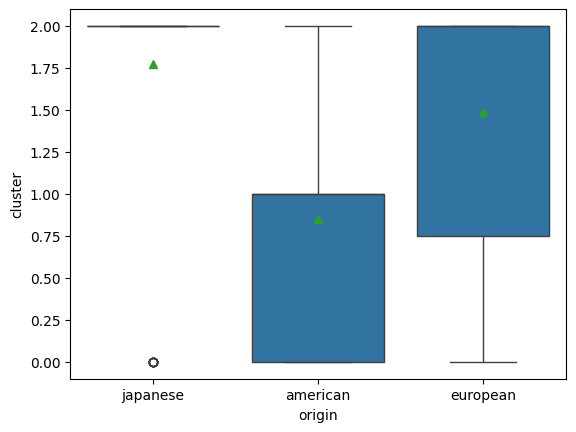

In [119]:
# analyze how clusters are distributed by origin
sns.boxplot(x='origin', y='cluster', data=cars, showmeans=True)

<Axes: xlabel='horsepower', ylabel='mpg'>

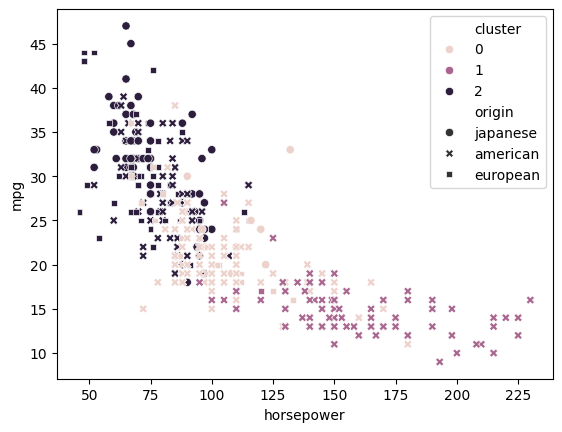

In [120]:
# how does horsepower relate to mpg? (highlight origin and cluster)
sns.scatterplot(x='horsepower', y='mpg', hue='cluster', style='origin', data=cars)